## Generating Synthetic Data

In [1]:
# DO NOT EDIT THIS FUNCTION; IF YOU WANT TO PLAY AROUND WITH DATA GENERATION, # MAKE A COPY OF THIS FUNCTION AND THEN EDIT
#
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def generate_data(n_samples, tst_frac=0.2, val_frac=0.2):
    # Generate a non-linear data set
    X, y = make_moons(n_samples=n_samples, noise=0.25, random_state=42)

    # Take a small subset of the data and make it VERY noisy; that is, generate outliers
    m = 30
    np.random.seed(30) # Deliberately use a different seed
    ind = np.random.permutation(n_samples)[:m]
    X[ind, :] += np.random.multivariate_normal([0, 0], np.eye(2), (m, ))
    y[ind] = 1 - y[ind]
    
    # Plot this data
    cmap = ListedColormap(['#b30065', '#178000'])
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolors='k')
    
    # First, we use train_test_split to partition (X, y) into training and test sets
    X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=tst_frac,
                                                random_state=42)
    # Next, we use train_test_split to further partition (X_trn, y_trn) into tra ining and validation sets
    X_trn, X_val, y_trn, y_val = train_test_split(X_trn, y_trn, test_size=val_frac, random_state=42)
    return (X_trn, y_trn), (X_val, y_val), (X_tst, y_tst)

In [2]:
#
#  DO NOT EDIT THIS FUNCTION; IF YOU WANT TO PLAY AROUND WITH VISUALIZATION,
#  MAKE A COPY OF THIS FUNCTION AND THEN EDIT
#
def visualize(models, param, X, y): # Initialize plotting
    if len(models) % 3 == 0:
        nrows = len(models) // 3
    else:
        nrows = len(models) // 3 + 1
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, 5.0 * nrows))
    cmap = ListedColormap(['#b30065', '#178000'])
            
    # Create a mesh
    xMin, xMax = X[:, 0].min() - 1, X[:, 0].max() + 1
    yMin, yMax = X[:, 1].min() - 1, X[:, 1].max() + 1
    xMesh, yMesh = np.meshgrid(np.arange(xMin, xMax, 0.01),
                                   np.arange(yMin, yMax, 0.01))
    
    for i, (p, clf) in enumerate(models.items()): # if i > 0:
        # break
        r, c = np.divmod(i, 3)
        ax = axes[r, c]
        
        # Plot contours
        zMesh = clf.decision_function(np.c_[xMesh.ravel(), yMesh.ravel()])
        zMesh = zMesh.reshape(xMesh.shape)
        ax.contourf(xMesh, yMesh, zMesh, cmap=plt.cm.PiYG, alpha=0.6)
        
        if (param == 'C' and p > 0.0) or (param == 'gamma'):
            ax.contour(xMesh, yMesh, zMesh, colors='k', levels=[-1, 0, 1],
                       alpha=0.5, linestyles=['--', '-', '--'])
        # Plot data
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolors='k')
        ax.set_title('{0} = {1}'.format(param, p))

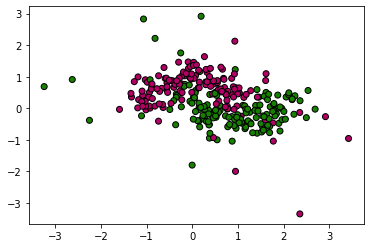

In [3]:
# Generate the data
n_samples = 300 # Total size of data set
(X_trn, y_trn), (X_val, y_val), (X_tst, y_tst) = generate_data(n_samples)

## The effect of the regularization parameter, *C*

Score of SVC(C=0.001) = 0.4583333333333333
Score of SVC(C=0.01) = 0.4583333333333333
Score of SVC(C=0.1) = 0.8333333333333334
Score of SVC() = 0.8958333333333334
Score of SVC(C=10.0) = 0.8958333333333334
Score of SVC(C=100.0) = 0.8958333333333334
Score of SVC(C=1000.0) = 0.8125
Score of SVC(C=10000.0) = 0.8958333333333334
Score of SVC(C=100000.0) = 0.8125
The best model is SVC(C=100000.0)


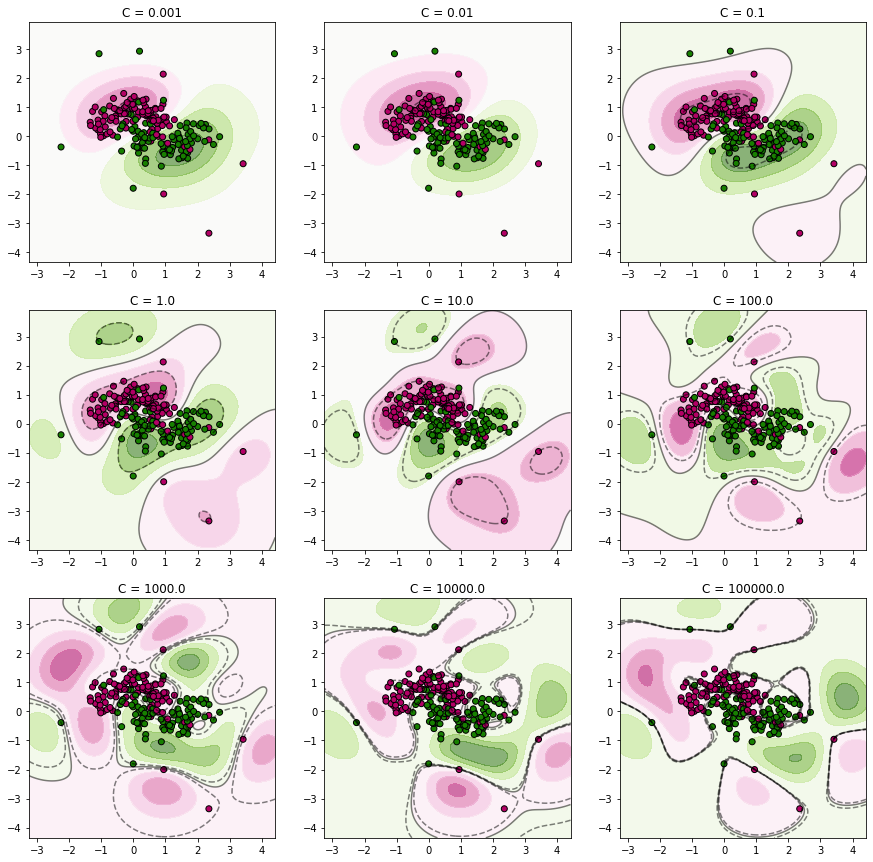

In [4]:
# Learn support vector classifiers with a radial-basis function kernel with # fixed gamma = 1 / (n_features * X.std()) and different values of C
C_range = np.arange(-3.0, 6.0, 1.0)
C_values = np.power(10.0, C_range)
models = dict()
trnErr = dict()
valErr = dict()
from sklearn.svm import SVC
for C in C_values:
    models[C] = SVC(C = C, kernel = 'rbf', gamma = 'scale')
    models[C].fit(X_trn, y_trn)
    
visualize(models, 'C', X_trn, y_trn)

max_score = 0
best_model = None
for C in C_values:
    # compute training and validation errors
    # training
    score = models[C].score(X_trn, y_trn)
    trnErr[str(models[C])] = score
    # validation
    score = models[C].score(X_val, y_val)
    valErr[str(models[C])] = score
    print("Score of {} = {}".format(models[C], score))
    if score > max_score:
        best_model = models[C]
print("The best model is {}".format(best_model))

Training and Validation Error Plot

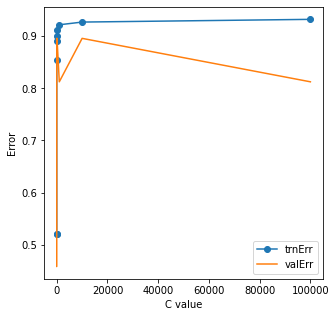

In [17]:
# plot training error and validation errors of all classifiers
plt.figure(figsize = (5,5))
plt.plot(C_values, list(trnErr.values()), marker = 'o')
plt.plot(C_values, list(valErr.values()), marker = '')
plt.xlabel('C value')
plt.ylabel('Error')
plt.legend(labels = ['trnErr', 'valErr'])
plt.show()

Discussion on the effect of various C values to SVM

* Look at the training-error and validation-error plot above, the SVM with higher C values converge when traning. 
* However, when C values increase, the corresponding SVM models perform poorer.
* In terms of the SVM's objective function, the higher C values add more loss values to update the SVM's weights. This observation could lead to overfitting that is observed in the error plot above. 

Perfromance/Accuracy of the best model on the test set

In [22]:
print("Accuracy of the best model {} is {}".format(best_model, best_model.score(X_tst, y_tst)))

Accuracy of the best model SVC(C=100000.0) is 0.7166666666666667


## The effect of the RBF kernel parameter, *γ*

Score of SVC(C=10.0, gamma=0.01) = 0.7708333333333334
Score of SVC(C=10.0, gamma=0.1) = 0.7916666666666666
Score of SVC(C=10.0, gamma=1.0) = 0.875
Score of SVC(C=10.0, gamma=10.0) = 0.875
Score of SVC(C=10.0, gamma=100.0) = 0.8125
Score of SVC(C=10.0, gamma=1000.0) = 0.6458333333333334
The best model is SVC(C=10.0, gamma=1000.0)


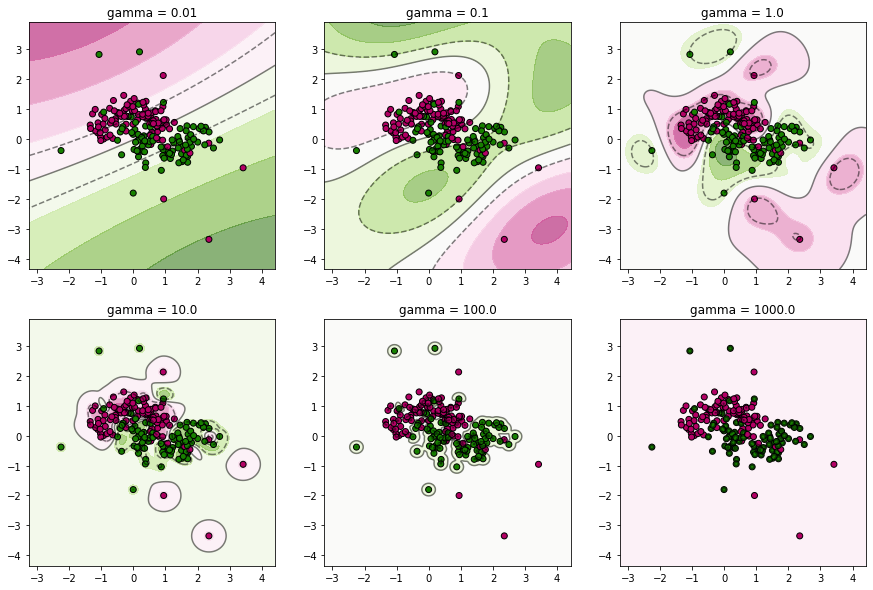

In [24]:
# Learn support vector classifiers with a radial-basis function kernel with # fixed C = 10.0 and different values of gamma
gamma_range = np.arange(-2.0, 4.0, 1.0)
gamma_values = np.power(10.0, gamma_range)
models = dict()
trnErr = dict()
valErr = dict()
for G in gamma_values:
    models[G] = SVC(C = 10.0, kernel = 'rbf', gamma = G)
    models[G].fit(X_trn, y_trn)
    
visualize(models, 'gamma', X_trn, y_trn)

max_score = 0
best_model = None
for G in gamma_values:
    # compute training and validation errors
    # training
    score = models[G].score(X_trn, y_trn)
    trnErr[str(models[G])] = score
    # validation
    score = models[G].score(X_val, y_val)
    valErr[str(models[G])] = score
    print("Score of {} = {}".format(models[G], score))
    if score > max_score:
        best_model = models[G]
print("The best model is {}".format(best_model))

Training and Validation Error Plot

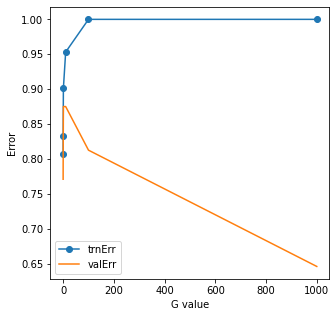

In [26]:
# plot training error and validation errors of all classifiers
plt.figure(figsize = (5,5))
plt.plot(gamma_values, list(trnErr.values()), marker = 'o')
plt.plot(gamma_values, list(valErr.values()), marker = '')
plt.xlabel('G value')
plt.ylabel('Error')
plt.legend(labels = ['trnErr', 'valErr'])
plt.show()

Discussion on the effect of various gamma values to SVM

* Look at the training-error and validation-error plot above, the SVM with higher gamma values converge when traning. 
* However, when gamma values increase, the corresponding SVM models perform poorer.
* In terms of the SVM's objective function, the higher gamma values add more loss values to update the SVM's weights. This observation could lead to overfitting that is observed in the error plot above. Mathematically, the larger gamma values lead to the smaller exponential log or kernel value. This means that the SVM models with kernel tricks lose its ability to learn non-linear features. Given that, models perform poorly in the test set.

Perfromance/Accuracy of the best model on the test set

In [ ]:
print("Accuracy of the best model {} is {}".format(best_model, best_model.score(X_tst, y_tst)))

## Breast Cancer Diagnosis with Support Vector Machines

### load data

In [11]:
# Load the Breast Cancer Diagnosis data set; download the files from eLearning
# CSV files can be read easily using np.loadtxt()
#
# Insert your code here.
#

In [12]:
#
# Insert your code here to perform model selection
#
#

## Breast Cancer Diagnosis with K-Nearest Neighbors

In [13]:
#
#
# Insert your code here to perform model selection
#
#

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>